# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# OpenWeatherMap API Key
weather_api_key = "YOUR KEY HERE!"

# Google API Key
g_key = "YOUR KEY HERE!"


In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API key
from config import api_key

#Import citipy data
from citipy import citipy

#Create file output
output_data = "output_data/weatherpy.csv"

## Generate Cities List

In [4]:
#Generate city data based on random coordinates and different query times

#Make lists for latitudes, longitudes and cities
lat_long = []
cities = []

#Crate random latitude and longitude coordinates
lat = np.random.uniform(-90,  90, 1500)
long = np.random.uniform(-180, 180, 1500)
lat_long = zip(lat, long)

#Call out city closest to each point on the list
for lat_long in lat_long: 
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    #Add city to list if it is unique
    if city not in cities:
        cities.append(city)
        
#print city list
print(cities)

['kapaa', 'shetpe', 'nanortalik', 'upernavik', 'ciudad bolivar', 'hobyo', 'rikitea', 'jamsa', 'busselton', 'hasaki', 'geraldton', 'port hardy', 'avarua', 'albany', 'dikson', 'kodiak', 'barentsburg', 'attawapiskat', 'swan hill', 'maceio', 'uwayl', 'erdenet', 'vaini', 'laguna', 'norman wells', 'tuatapere', 'opuwo', 'qaanaaq', 'chuy', 'barrow', 'mitzic', 'springbok', 'umzimvubu', 'east london', 'hobart', 'tasiilaq', 'bethel', 'acapulco', 'saint-philippe', 'nouadhibou', 'sentyabrskiy', 'cape town', 'mataura', 'yirol', 'hithadhoo', 'yellowknife', 'caravelas', 'taolanaro', 'sao gabriel da cachoeira', 'hilo', 'jamestown', 'duz', 'port alfred', 'khatanga', 'vaitupu', 'ushuaia', 'san pedro', 'sur', 'puerto ayora', 'isangel', 'severo-kurilsk', 'port lincoln', 'maues', 'hovd', 'selty', 'sampit', 'hualmay', 'vardo', 'basco', 'olafsvik', 'atar', 'smithville', 'terney', 'pacific grove', 'catalina', 'port elizabeth', 'vostok', 'pangnirtung', 'tiksi', 'placido de castro', 'kamenskoye', 'lar', 'daudnag

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:

#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,kapaa,,,,,,,
1,shetpe,,,,,,,
2,nanortalik,,,,,,,
3,upernavik,,,,,,,
4,ciudad bolivar,,,,,,,


In [22]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Set base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='


#Run API call for each city on the list
print('''
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    
    #Build new url for each city within the API call
    query_url = base_url + row['City'] + ',' + '&APPID=' + api_key
    
    #API call response
    response = requests.get(query_url).json()
    
    #If city is not found in the API call
    try: 
        #Message to alert the user that the data is being retrieved
        print(f'Processing Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print('City not found. Skipping...')
    
    #Set limits to API call
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-------------------------------
Data Retrieval Complete
-------------------------------''')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Kapaa
Processing Record 2 of Set 1 | Shetpe
Processing Record 3 of Set 1 | Nanortalik
Processing Record 4 of Set 1 | Upernavik
Processing Record 5 of Set 1 | Ciudad Bolivar
Processing Record 6 of Set 1 | Hobyo
Processing Record 7 of Set 1 | Rikitea
Processing Record 8 of Set 1 | Jämsä
Processing Record 9 of Set 1 | Busselton
Processing Record 10 of Set 1 | Hasaki
Processing Record 11 of Set 1 | Geraldton
Processing Record 12 of Set 1 | Port Hardy
Processing Record 13 of Set 1 | Avarua
Processing Record 14 of Set 1 | Albany
Processing Record 15 of Set 1 | Dikson
Processing Record 16 of Set 1 | Saint Paul Harbor
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 | Swan Hill
Processing Record 18 of Set 1 | Maceió
City not found. Skipping...
Processing Record 19 of Set 1 | Erdenet
Processing Record 20 of Set 1 | Vaini
Processing Record 21 of Set 1 | Laguna
Processing Re

Processing Record 31 of Set 4 | Bredasdorp
Processing Record 32 of Set 4 | Mogadishu
Processing Record 33 of Set 4 | Ribeira Grande
Processing Record 34 of Set 4 | Atuona
Processing Record 35 of Set 4 | Paraná
Processing Record 36 of Set 4 | Port-Cartier
Processing Record 37 of Set 4 | Vao
Processing Record 38 of Set 4 | Milazzo
Processing Record 39 of Set 4 | Medicine Hat
Processing Record 40 of Set 4 | Mt. Pleasant
Processing Record 41 of Set 4 | Drumheller
Processing Record 42 of Set 4 | Ilulissat
Processing Record 43 of Set 4 | Erice
Processing Record 44 of Set 4 | Bolgar
Processing Record 45 of Set 4 | Tarifa
Processing Record 46 of Set 4 | Comodoro Rivadavia
Processing Record 47 of Set 4 | Grand Gaube
Processing Record 48 of Set 4 | Danielskuil
Processing Record 49 of Set 4 | Mayumba
City not found. Skipping...
City not found. Skipping...
Processing Record 50 of Set 4 | Ucluelet
Processing Record 1 of Set 5 | Chicama
Processing Record 2 of Set 5 | Radcliff
Processing Record 3 of 

Processing Record 10 of Set 8 | Östersund
Processing Record 11 of Set 8 | Kudahuvadhoo
Processing Record 12 of Set 8 | Pisco
Processing Record 13 of Set 8 | Bara
Processing Record 14 of Set 8 | Thunder Bay
City not found. Skipping...
Processing Record 15 of Set 8 | Klaksvík
Processing Record 16 of Set 8 | Nyagan
City not found. Skipping...
Processing Record 17 of Set 8 | Daru
Processing Record 18 of Set 8 | Cartagena
Processing Record 19 of Set 8 | Teluknaga
Processing Record 20 of Set 8 | Sitka
Processing Record 21 of Set 8 | Leh
Processing Record 22 of Set 8 | Luwuk
Processing Record 23 of Set 8 | Leshukonskoye
Processing Record 24 of Set 8 | San Juan Bautista
Processing Record 25 of Set 8 | Goianésia
City not found. Skipping...
Processing Record 26 of Set 8 | Beloha
Processing Record 27 of Set 8 | Sorong
Processing Record 28 of Set 8 | Kieta
Processing Record 29 of Set 8 | Beringovskiy
Processing Record 30 of Set 8 | Kargopol'
Processing Record 31 of Set 8 | Lompoc
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Clean dataframe 
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("output_data/CityWeatherData.csv", index = False, header = True)

#Preview 
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,kapaa,40,1600918429,66,22.08,-159.32,302.15,6.7
1,shetpe,0,1600918429,27,44.17,52.12,290.06,2.61
2,nanortalik,100,1600918429,76,60.14,-45.24,276.74,8.7
3,upernavik,98,1600918429,87,72.79,-56.15,269.23,3.83
4,ciudad bolivar,79,1600918430,84,8.12,-63.55,299.66,3.75


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
#Check for maximum humidity
max(city_weather['Humidity'])

#Skip this step becaue there are no cities that have humidity > 100%

100

In [17]:
#  Get the indices of cities that have humidity over 100%.
#Skip this step 

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Skip this step

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

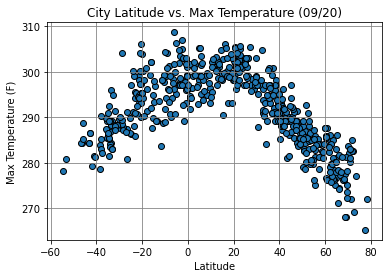

In [42]:
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], edgecolors = 'black')
plt.title('City Latitude vs. Max Temperature (09/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b = False, which = 'major', axis = 'both', linestyle = '-', color = 'grey')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

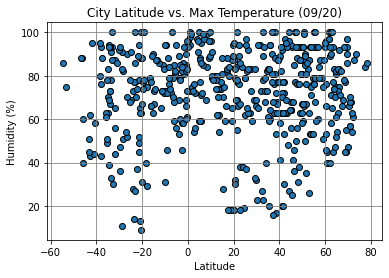

In [43]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], edgecolors = 'black')
plt.title('City Latitude vs. Humidity (09/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b = False, which = 'major', axis = 'both', linestyle = '-', color = 'grey')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

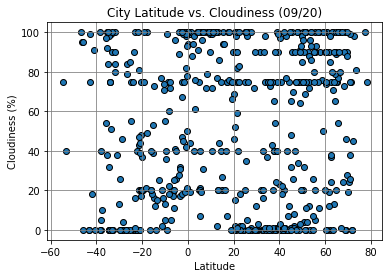

In [45]:
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness (09/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b = False, which = 'major', axis = 'both', linestyle = '-', color = 'grey')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

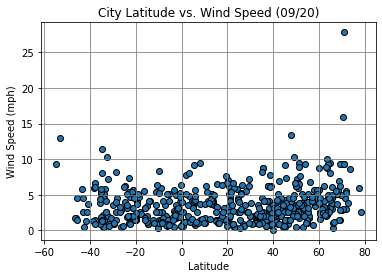

In [47]:
plt.scatter(city_weather['Lat'], city_weather['Windspeed'], edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (09/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b = False, which = 'major', axis = 'both', linestyle = '-', color = 'grey')
plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


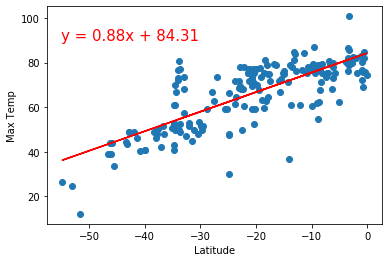

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


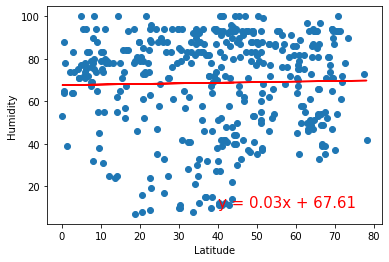

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


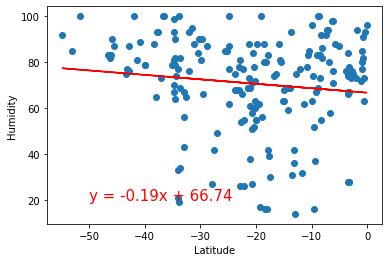

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


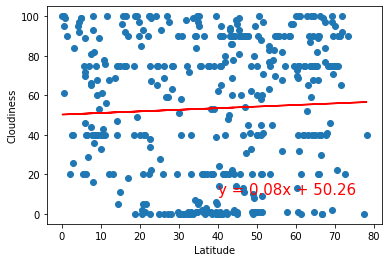

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


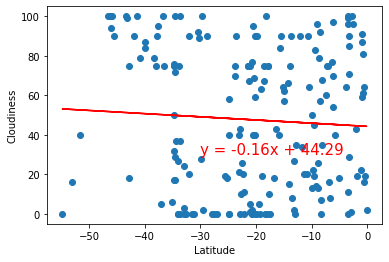

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


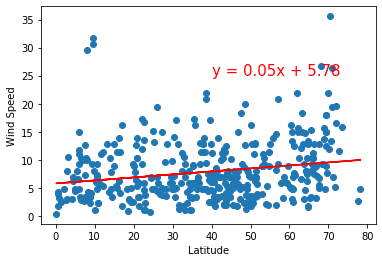

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


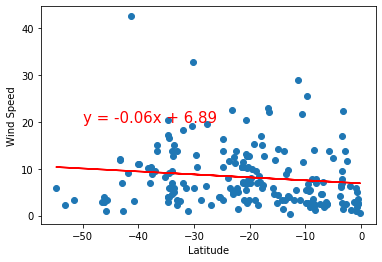